In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/partially-controllable-MDP


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import OrderedDict, defaultdict
import gymnasium as gym
import json
import matplotlib.ticker as ticker
from algo.utils import key_to_obs, build_state_index_map
from pcmdp.utils import parameter_generator


colors = sns.color_palette('colorblind', 30)

## Taxi Env

In [26]:
seed = 46
prob = 0.2

In [27]:
# Non spawning passenger
rng = np.random.default_rng(seed)
samples = rng.binomial(1, prob, size=200)

In [28]:
len(samples[samples == 1])

23

In [37]:
rng = np.random.default_rng(seed)
samples = np.array([rng.binomial(1, prob) for _ in range(200)])

In [38]:
len(samples[samples == 1])

128

In [40]:
rng = np.random.default_rng(seed)
samples = [rng.choice(4, size=2, replace=False) for _ in range(10)]
samples

[array([3, 1]),
 array([2, 0]),
 array([2, 0]),
 array([3, 2]),
 array([2, 3]),
 array([2, 0]),
 array([1, 2]),
 array([3, 2]),
 array([1, 3]),
 array([0, 2])]

In [ ]:
# Changing destination

In [135]:
seed = 12
prob = 0.18

In [136]:
rng = np.random.default_rng(seed)
fickle_steps = [rng.binomial(1, prob) for _ in range(200)]

In [137]:
sum(fickle_steps)

38

In [105]:
def plot_learning_curves(results_dict, 
                         title="Evaluation Performance", 
                         figsize=(8, 5), 
                         tick_step=100,
                         max_idx=-1,
                         logscale=False):
    """
    Plot mean evaluation return per episode across seeds and algorithms,
    with 95% confidence intervals.
    
    results_dict: dict
        {algorithm: {seed: {episode: [returns, ...]}}}
    """
    plt.figure(figsize=figsize)
    
    for i, (algo, seeds_dict) in enumerate(results_dict.items()):
        # Collect per-seed mean reward per episode
        all_seeds_curves = []
        
        for seed, episodes_dict in seeds_dict.items():
            episodes = np.array(sorted([int(k) for k in episodes_dict.keys()]))
            episodes = episodes[:max_idx]
            
            # mean over test evaluations for this seed
            per_episode_mean = np.array([np.mean(episodes_dict[str(e)]) for e in episodes])
            all_seeds_curves.append(per_episode_mean)
        
        all_seeds_curves = np.array(all_seeds_curves)  # shape (n_seeds, n_episodes)
        mean_curve = np.mean(all_seeds_curves, axis=0)
        sem = stats.sem(all_seeds_curves, axis=0)
        ci95 = 1.96 * sem  # 95% confidence interval

        plt.plot(episodes, mean_curve, label=algo, color=colors[i], linewidth=2)
        plt.fill_between(episodes, mean_curve - ci95, mean_curve + ci95, color=colors[i], alpha=0.2)
    
    plt.xlabel("Training Episode", fontsize=12)
    plt.ylabel("Evaluation Return (mean ± 95% CI)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(title="Algorithm")
    
    step = max(1, tick_step)
    plt.xticks(np.arange(0, episodes.max()+1, step))
    if logscale:
        plt.xscale('log')
    
    plt.tight_layout()
    plt.show()

In [138]:
res = {}
res['noSpawnProb-fickleProb0_1'] = {}
res['noSpawnProb-fickleProb0_15'] = {}
res['noSpawnProb-fickleProb0_18'] = {}
res['noSpawnProb-fickleProb0_2'] = {}
res['noSpawnProb-fickleProb0_3'] = {}
res['SpawnProb0_6-fickleProb0_1'] = {}
res['SpawnProb0_6-fickleProb0_15'] = {}
res['SpawnProb0_6-fickleProb0_18'] = {}
res['SpawnProb0_6-fickleProb0_2'] = {}
res['SpawnProb0_6-fickleProb0_3'] = {}

for i in range(1, 5):
    with open(f'logs/results/taxi/noSpawnProb/exa_vi/fickle_prob0_1/{i}/learning_curve.json', 'r') as f:
        res['noSpawnProb-fickleProb0_1'][i] = json.load(f)
        
    with open(f'logs/results/taxi/noSpawnProb/exa_vi/fickle_prob0_15/{i}/learning_curve.json', 'r') as f:
        res['noSpawnProb-fickleProb0_15'][i] = json.load(f)
    
    with open(f'logs/results/taxi/noSpawnProb/exa_vi/fickle_prob0_18/{i}/learning_curve.json', 'r') as f:
        res['noSpawnProb-fickleProb0_18'][i] = json.load(f)

    with open(f'logs/results/taxi/noSpawnProb/exa_vi/fickle_prob0_2/{i}/learning_curve.json', 'r') as f:
        res['noSpawnProb-fickleProb0_2'][i] = json.load(f)
    
    with open(f'logs/results/taxi/noSpawnProb/exa_vi/fickle_prob0_3/{i}/learning_curve.json', 'r') as f:
        res['noSpawnProb-fickleProb0_3'][i] = json.load(f)
        
    with open(f'logs/results/taxi/SpawnProb0_6/exa_vi/fickle_prob0_1/{i}/learning_curve.json', 'r') as f:
        res['SpawnProb0_6-fickleProb0_1'][i] = json.load(f)
    
    with open(f'logs/results/taxi/SpawnProb0_6/exa_vi/fickle_prob0_15/{i}/learning_curve.json', 'r') as f:
        res['SpawnProb0_6-fickleProb0_15'][i] = json.load(f)
    
    with open(f'logs/results/taxi/SpawnProb0_6/exa_vi/fickle_prob0_18/{i}/learning_curve.json', 'r') as f:
        res['SpawnProb0_6-fickleProb0_18'][i] = json.load(f)

    with open(f'logs/results/taxi/SpawnProb0_6/exa_vi/fickle_prob0_2/{i}/learning_curve.json', 'r') as f:
        res['SpawnProb0_6-fickleProb0_2'][i] = json.load(f)
    
    with open(f'logs/results/taxi/SpawnProb0_6/exa_vi/fickle_prob0_3/{i}/learning_curve.json', 'r') as f:
        res['SpawnProb0_6-fickleProb0_3'][i] = json.load(f)

In [139]:
for key, res_dict in res.items():
    min_val = [len(val) for val in res_dict.values()]
    print(key, min_val)

noSpawnProb-fickleProb0_1 [99, 99, 99, 99]
noSpawnProb-fickleProb0_15 [99, 99, 99, 99]
noSpawnProb-fickleProb0_18 [99, 99, 99, 99]
noSpawnProb-fickleProb0_2 [99, 99, 99, 99]
noSpawnProb-fickleProb0_3 [99, 99, 99, 99]
SpawnProb0_6-fickleProb0_1 [51, 51, 51, 51]
SpawnProb0_6-fickleProb0_15 [99, 99, 99, 99]
SpawnProb0_6-fickleProb0_18 [99, 99, 99, 99]
SpawnProb0_6-fickleProb0_2 [99, 99, 99, 99]
SpawnProb0_6-fickleProb0_3 [99, 99, 99, 99]


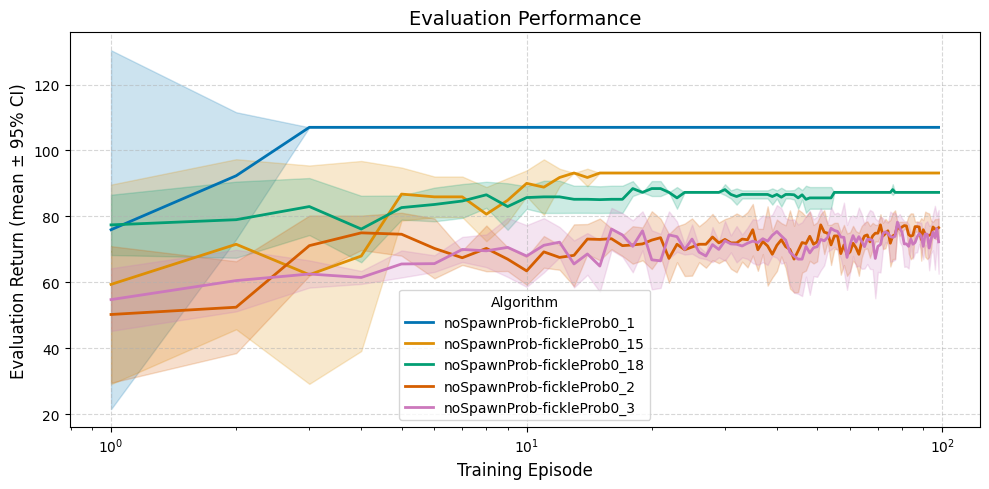

In [140]:
to_compare = {k:v for k, v in res.items() if k.startswith('noSpawnProb')}
plot_learning_curves(to_compare, figsize=(10,5), tick_step=20, logscale=True)

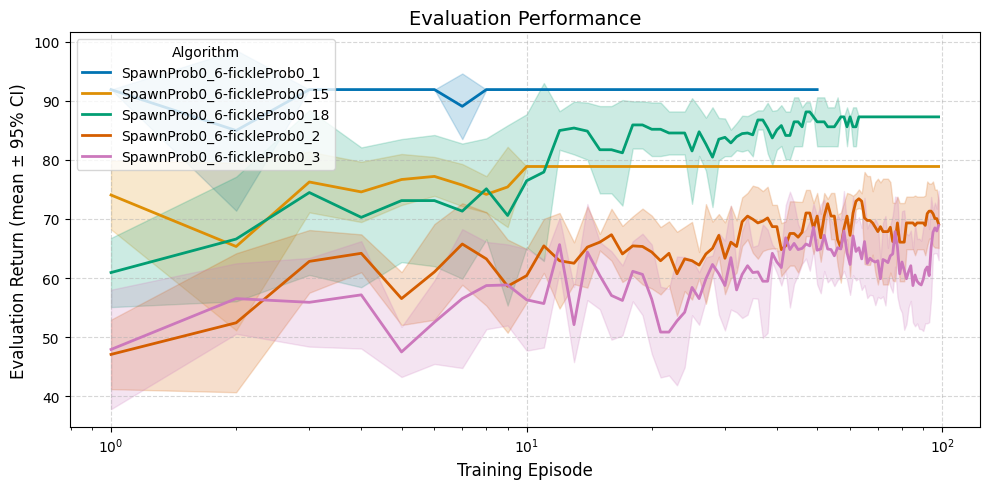

In [141]:
to_compare = {k:v for k, v in res.items() if k.startswith('SpawnProb0_6')}
plot_learning_curves(to_compare, figsize=(10,5), tick_step=20, logscale=True)

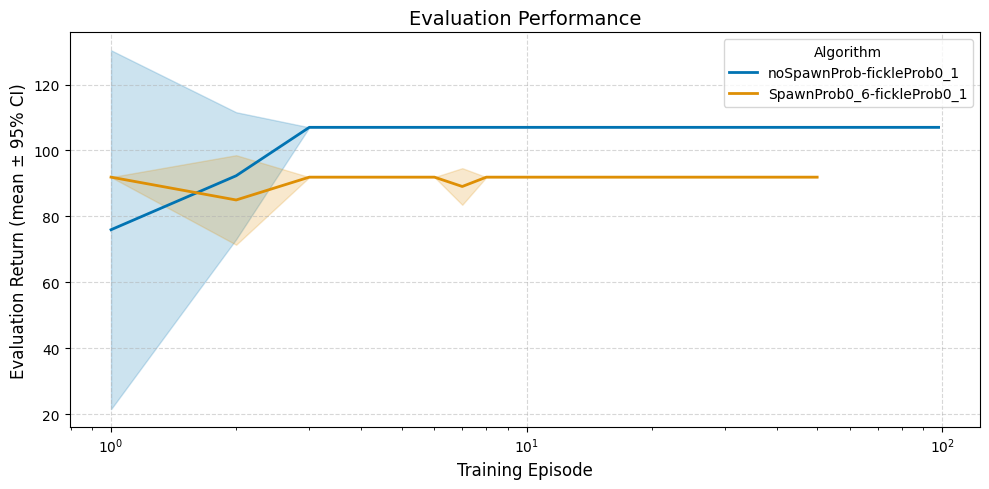

In [142]:
to_compare = {k:v for k, v in res.items() if k.endswith('0_1')}
plot_learning_curves(to_compare, figsize=(10,5), tick_step=20, logscale=True)

## Elevator Env

In [135]:
seed = 12
lambda_min = 0.01
lambda_max = 0.3
n_queues = 3

In [136]:
rng = np.random.default_rng(seed)
arrivals = []

for i in range(n_queues):
    lambd = rng.uniform(lambda_min, lambda_max)
    #lambd = 0.3
    arrivals.append(rng.poisson(lambd, size=300))

In [137]:
arrivals

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [138]:
sums = []
for a in arrivals:
    sums.append(int(np.sum(a>0)))
sums

[26, 29, 72]

In [139]:
np.array(sums) / 300, np.sum(arrivals, axis=1) / 300

(array([0.08666667, 0.09666667, 0.24      ]),
 array([0.08666667, 0.10666667, 0.26333333]))

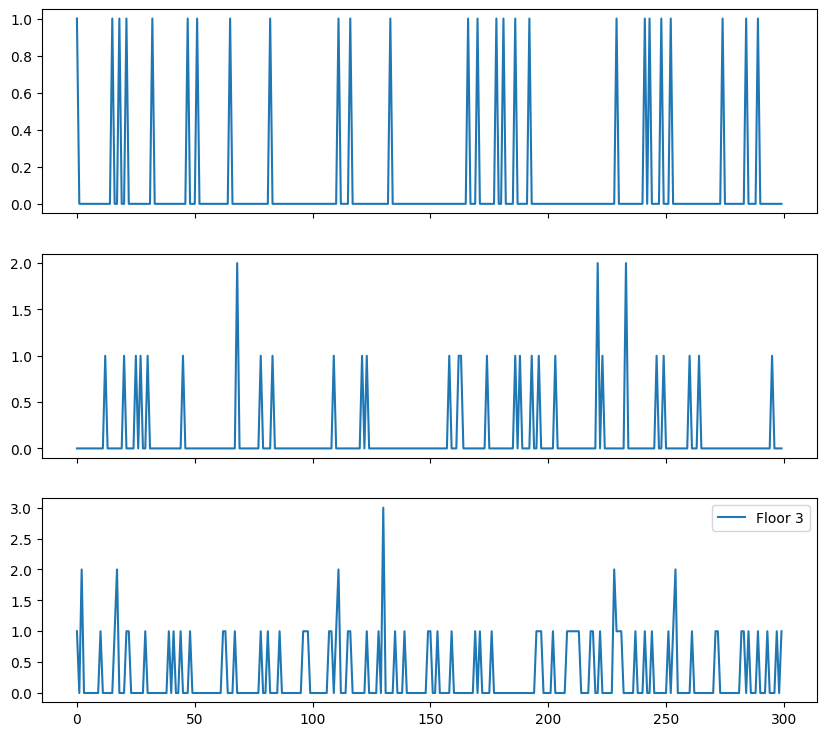

In [140]:
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

for i in range(n_queues):
    timesteps = range(len(arrivals[i]))
    axes[i].plot(timesteps, arrivals[i], label=f'Floor {i+1}')

plt.legend()
plt.show()